# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Outlier Detection Techniques</div>

<center>
<img src="https://letsdatascience.com/wp-content/uploads/2023/07/Outlier-Detection.webp" alt="Image" style="width: auto; height: auto; border:solid 2px teal">
</center>

<div style="background:#7681B3; color: white; font-size: 16px; width: auto; height: auto; padding:5px;; margin:2px;border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">

<span style="font-size:20px">What is an outlier?</span><br>
An outlier is a data point that significantly deviates from the rest of the data. It can be either much higher or much lower than the other data points, and its presence can have a significant impact on the results of machine learning algorithms. They can be caused by measurement or execution errors. The analysis of outlier data is referred to as outlier analysis or outlier mining.<br>
    
<span style="font-size:20px">Popular Outlier Detection Techniques</span><br>
1. Z-Score<br>
2. IQR (Interquartile Range)<br>
3. LOF (Local Outlier Factor)<br>
4. Isolation Forest<br>
5. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)<br>
</div>

# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Notebook Setup</div>

## <div style="background:#55286F; color: white; font-size: 25px; text-align: left; width: auto; height: auto; padding:10px; margin:2px; padding-left:20px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">1. Imporing Libraries</div>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


warnings.filterwarnings('ignore')

## <div style="background:#55286F; color: white; font-size: 25px; text-align: left; width: auto; height: auto; padding:10px; margin:2px; padding-left:20px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">2. Loading Data</div>

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## <div style="background:#55286F; color: white; font-size: 25px; text-align: left; width: auto; height: auto; padding:10px; margin:2px; padding-left:20px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">3. Selecting Features</div>

In [3]:
features = list(df.iloc[:,1:-1].columns)
print(f"Selected Features: {features}")

Selected Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


## <div style="background:#55286F; color: white; font-size: 25px; text-align: left; width: auto; height: auto; padding:10px; margin:2px; padding-left:20px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">4. Basic Visualization</div>

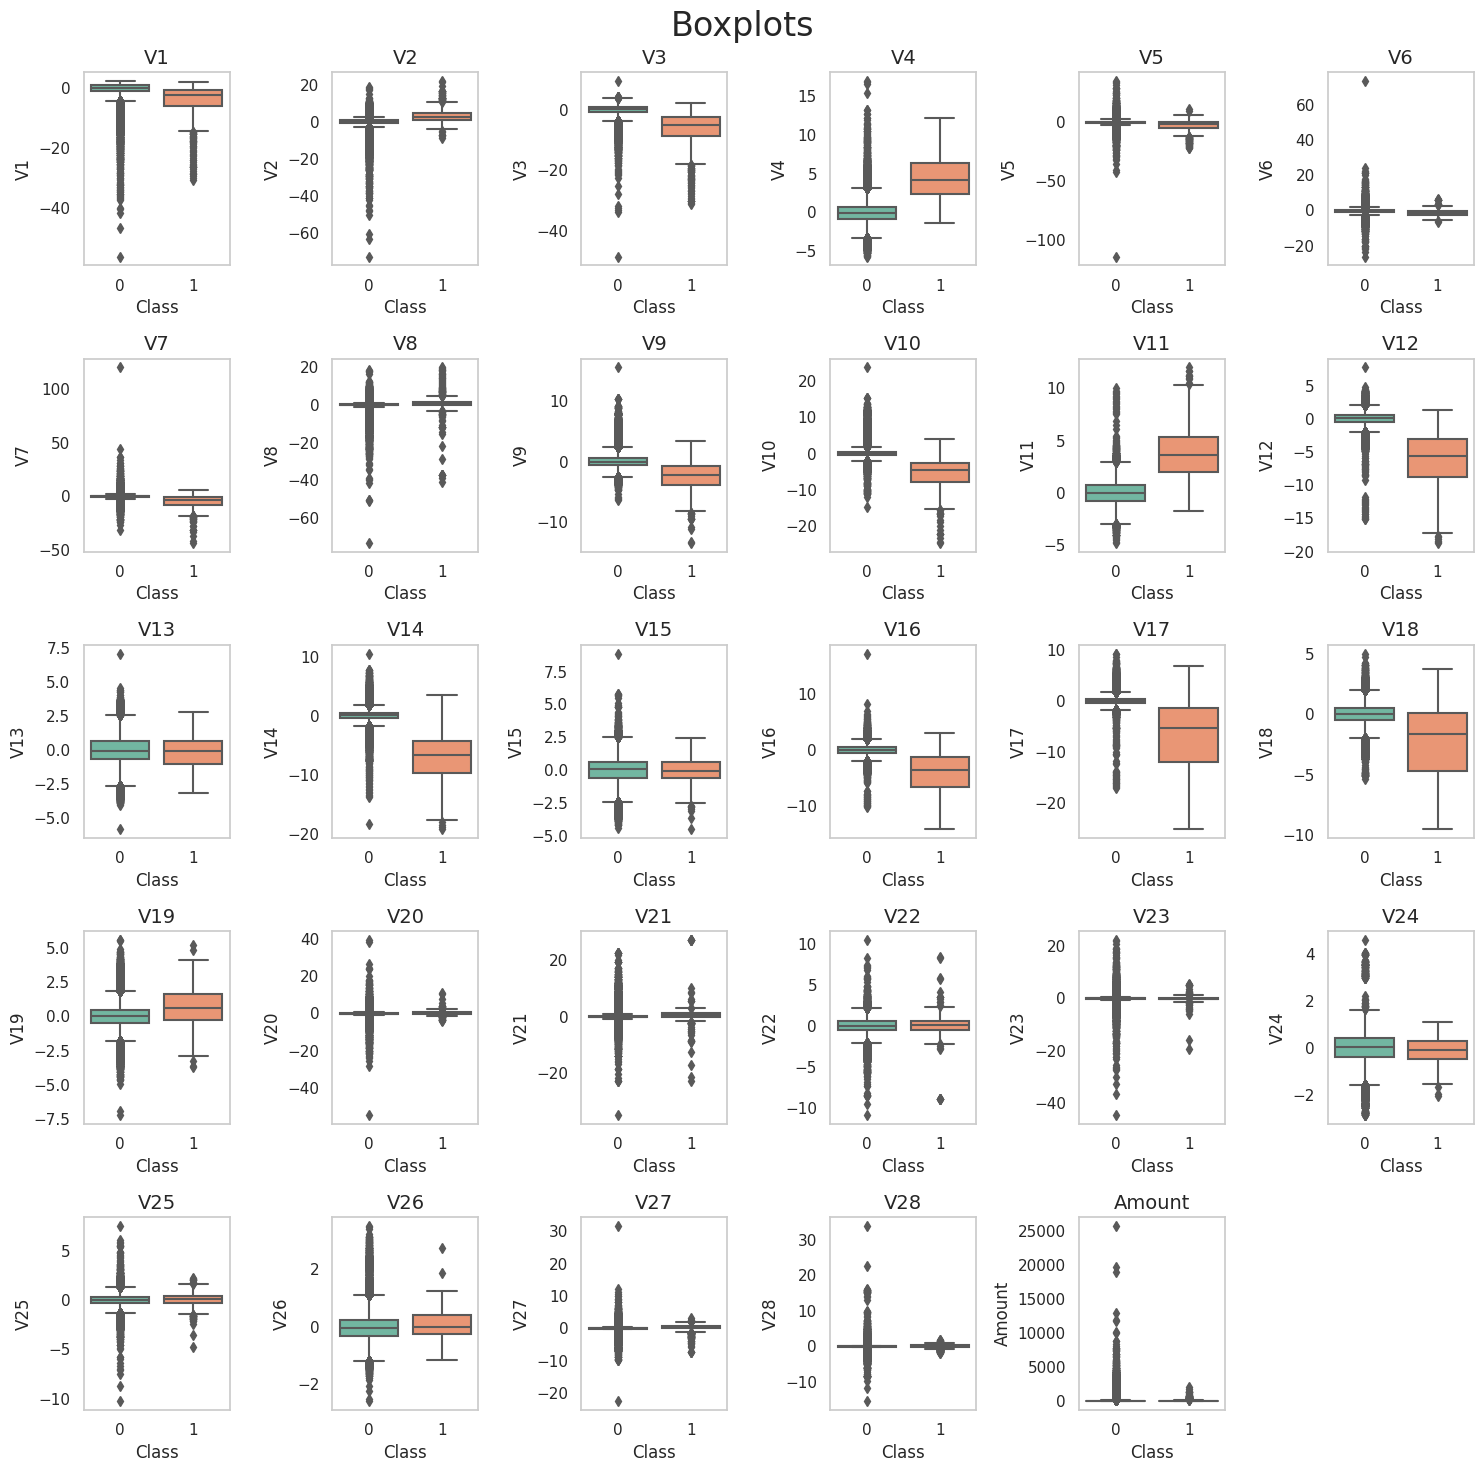

In [4]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 6, figsize=(15, 15), sharex=False, sharey=False)
axes = axes.flatten()  

for i, feature in enumerate(features):
    sns.boxplot(data=df, ax=axes[i], x='Class', y=feature,palette='Set2')
    axes[i].set_title(feature, fontsize=14)
    axes[i].grid(False)

for j in range(29, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots", size=24)
plt.tight_layout()
plt.show()

<div style="background:#7681B3; color: white; font-size: 16px; width: auto; height: auto; padding:5px; border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">The boxplots show many outliers for each feature, indicating that many data points are far from the average, which might point to anomalies or extreme values.</div>

## <div style="background:#55286F; color: white; font-size: 25px; text-align: left; width: auto; height: auto; padding:10px; margin:2px; padding-left:20px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">5. Helper Function</div>

In [5]:
def plotting_histograms(df, selected_features, title):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 4, figsize=(15, 5))
    axes = axes.flatten()

    # Plot histograms for each selected feature
    for i, feature in enumerate(selected_features):
        sns.histplot(data=df, ax=axes[i], x=feature, color="magenta", kde=False)
        axes[i].set_title(feature, fontsize=14)
        axes[i].grid(False)

    # Remove extra subplots if any
    for j in range(len(selected_features), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"{title}", size=20)
    plt.tight_layout()
    plt.show()

# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Z-Score</div>

<div style="background:#7681B3; color: white; font-size: 16px; width: auto; height: auto; padding:5px;border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">The Z-score, or standard score, measures how many standard deviations a data point is from the mean. It quantifies the distance of a data point from the mean, expressed in standard deviations. In this context, data points with a Z-score greater than 3 or less than -3 are considered outliers, indicating that they are significantly different from the majority of the data.</div> <br>

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240627123124/Z---Score-in-Statistics.webp" alt="Image" style="width: auto; height: auto; border:solid 2px teal">
</center>

In [6]:
# Function To detect oulier and return indices of outliers using Z-Score
def detect_outliers_z_score(df, features,  threshold=3):
    """Detect unique outlier indices in specified columns of a DataFrame using Z-scores.

    This function identifies data points that are considered outliers based on the Z-score,
    which measures how many standard deviations a data point is from the mean. Outliers are
    those data points with a Z-score greater than the specified threshold."""
    
    outlier_set = set() 
    
    for feature in features:
        # Calculate the Z-scores
        mean = df[feature].mean()
        std_dev = df[feature].std()
        z_scores = abs(df[feature] - mean) / std_dev
        
        # Adding outlier indices
        outlier_indices = df[z_scores > threshold].index
        outlier_set.update(outlier_indices)
        
    print("Total Outliers:", len(outlier_set))
    
    return sorted(outlier_set)

In [7]:
# Detecting Outliers
outlier_indices = detect_outliers_z_score(df, features)

# Removing Outliers
new_df1 = df.drop(index=outlier_indices, axis=0).reset_index(drop=True)

Total Outliers: 37816


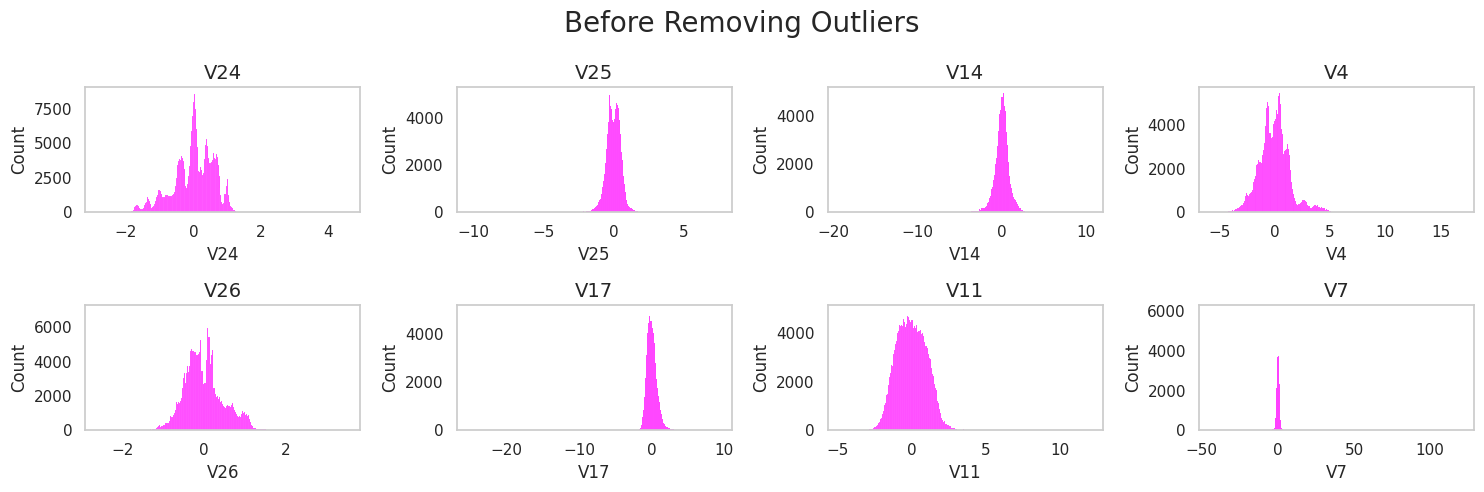

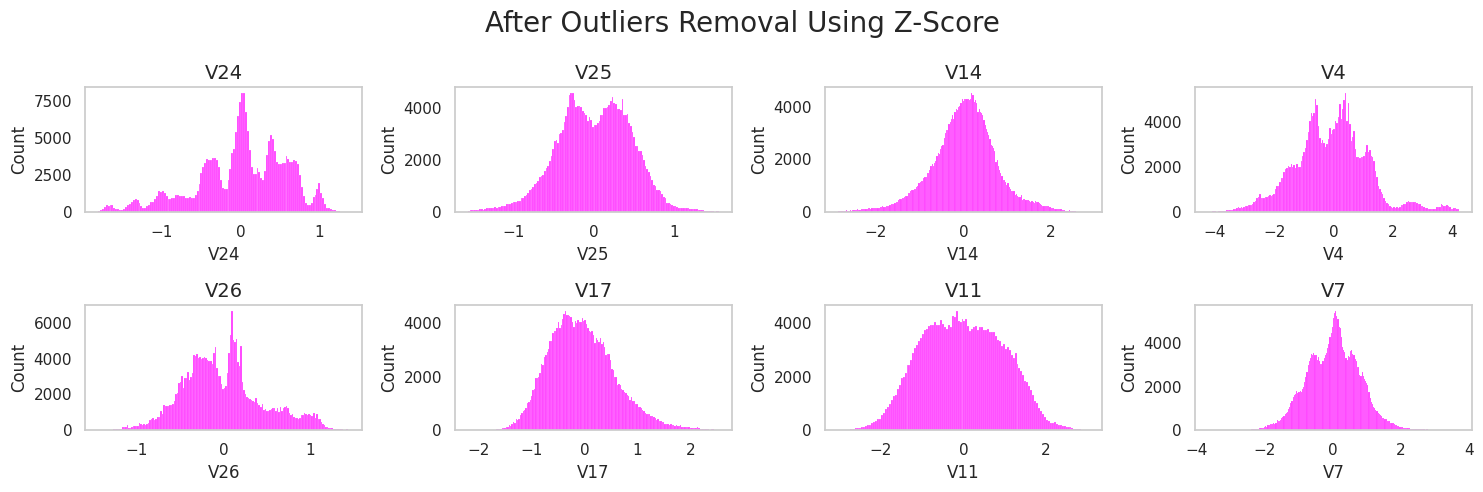

In [8]:
# Visualzing Features Before and after removal of outlier using Z-Score
viz_features = np.random.choice(features, 8, replace=False)
plotting_histograms(df, viz_features, "Before Removing Outliers")
plotting_histograms(new_df1, viz_features, "After Outliers Removal Using Z-Score")

# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">IQR - Interquartile Range</div>

<div style="background:#7681B3; color: white; font-size: 16px; width: auto; height: auto; padding:5px;border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">The Interquartile Range, or IQR, is a measure of statistical dispersion. It represents the range within which the middle 50% of the data falls. To calculate the IQR, you need to find the difference between the 75th percentile (Q3) and the 25th percentile (Q1).
<br><center>IQR = Q3 — Q1</center><br>
    
To identify outliers using the IQR method, we establish two boundaries:<br>
Lower Bound: Q1 – 1.5 * IQR<br>
Upper Bound: Q3 + 1.5 * IQR<br>

Any data point that falls below the lower bound is considered an outlier beacuse these values are significantly lower than the majority of the dataset.
Conversely, any data point that exceeds the upper bound is also considered an outlier because these values are much higher than the majority of the datase.
</div> <br>

<center>
<img src="https://assets.datacamp.com/production/repositories/5758/datasets/ca7e6e1832be7ec1842f62891815a9b0488efa83/Screen%20Shot%202020-04-28%20at%2010.04.54%20AM.png" alt="Image" style="width: auto; height: auto; border:solid 2px teal">
</center>

In [9]:
# Function To detect oulier and return indices of outliers using IQR
def detect_outliers_iqr(df, features):
    """Detect unique outlier indices in specified columns of a DataFrame using IQR.

    This function identifies data points that are considered outliers based on the Interquartile Range (IQR).
    Outliers are those data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR."""
    
    outlier_set = set()
    for feature in features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1 
        
        # Define the bounds for outliers
        lower_bound = Q1 - (IQR * 1.5)
        upper_bound = Q3 + (IQR * 1.5)
        
        # Finding outlier indices
        outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_set.update(outlier_indices)
        
    print("Total Outliers:", len(outlier_set))
    return sorted(outlier_set)

In [10]:
# Detecting Outliers
outlier_indices = detect_outliers_iqr(df, features)

# Removing Outliers
new_df2 = df.drop(index=outlier_indices, axis=0).reset_index(drop=True)

Total Outliers: 138473


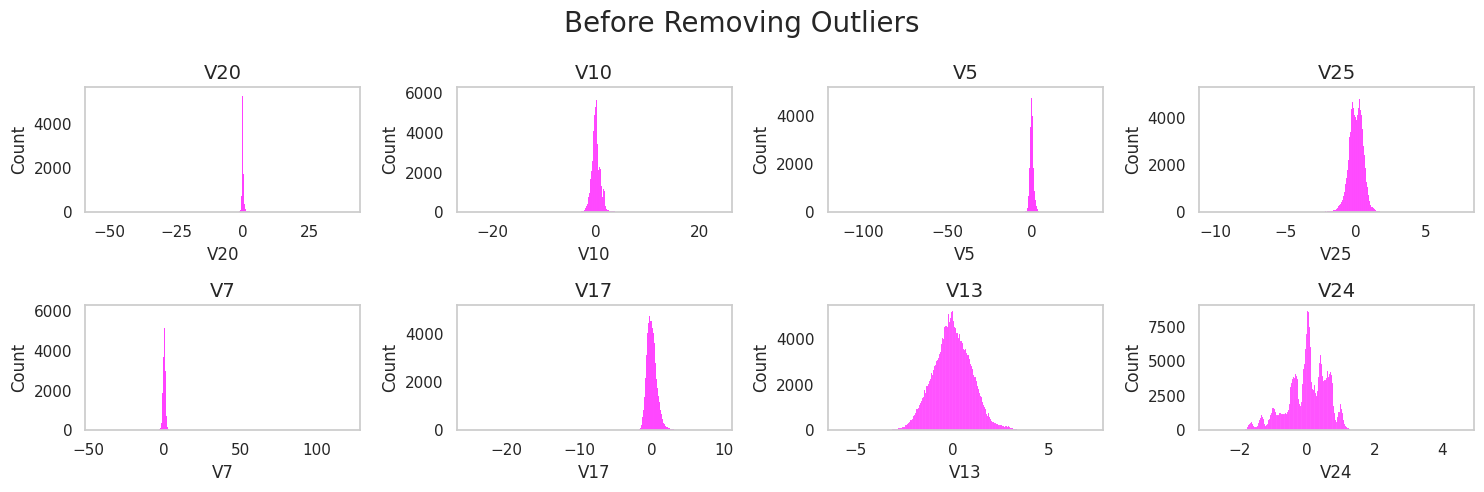

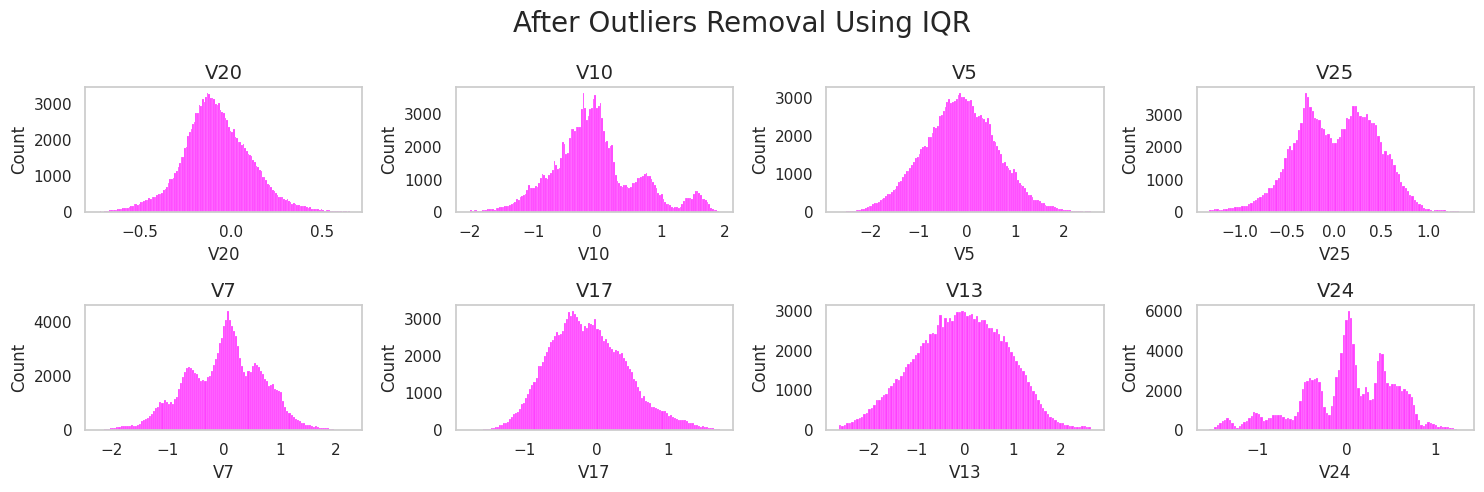

In [11]:
# Visualzing Features Before and after removal of outlier using IQR
viz_features = np.random.choice(features, 8, replace=False)
plotting_histograms(df, viz_features, "Before Removing Outliers")
plotting_histograms(new_df2, viz_features, "After Outliers Removal Using IQR")

# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">LOF - Local Outlier Factor</div>

<div style="background:#7681B3; color: white; font-size: 16px; width: auto; height: auto; padding:5px;border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Local Outlier Factor (LOF) is an outlier detection method that looks at how isolated a data point is compared to its neighbors. It calculates a score based on the density of points around it. If a point is in a less dense region compared to others nearby, it is marked as an outlier. The higher the score, the more likely the point is an outlier. LOF is useful because it considers how close data points are to their surroundings.
</div> <br>

<center>
<img src="https://dm.cs.tu-dortmund.de/en/mlbits/outlier-local/outlier-local-00.svg" alt="Image" style="width: auto; height: auto; border:solid 2px teal; background:white;">
</center>

In [12]:
# Function to detect outliers and return indices of outliers using LOF
def detect_outliers_lof(df, features, n_neighbors=20):
    """Detect unique outlier indices in specified columns of a DataFrame using Local Outlier Factor (LOF).

    This function identifies data points that are considered outliers based on the Local Outlier Factor (LOF).
    LOF measures the local deviation of density of a data point with respect to its neighbors.
    """
    
    # Extract the data for the specified features
    data = df[features].values
    
    # Initialize the LocalOutlierFactor model
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    
    # Fit the model and predict outliers (-1 indicates an outlier)
    outliers = lof.fit_predict(data)
    
    # Find the indices of the outliers
    outlier_indices = np.where(outliers == -1)[0]
    
    # Convert to a set to remove duplicates, then return as a sorted list
    outlier_set = set(outlier_indices)
    
    print("Total Outliers:", len(outlier_set))
    return sorted(outlier_set)

In [13]:
# Detecting Outliers
outlier_indices = detect_outliers_lof(df, features)

# Removing Outliers
new_df3 = df.drop(index=outlier_indices, axis=0).reset_index(drop=True)

Total Outliers: 12314


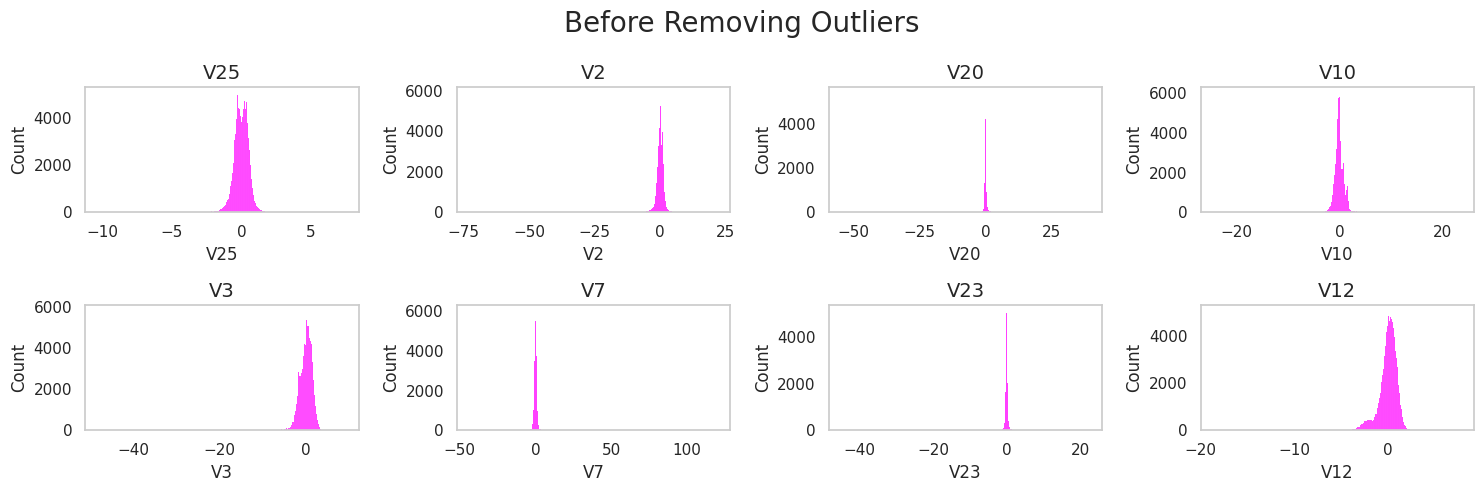

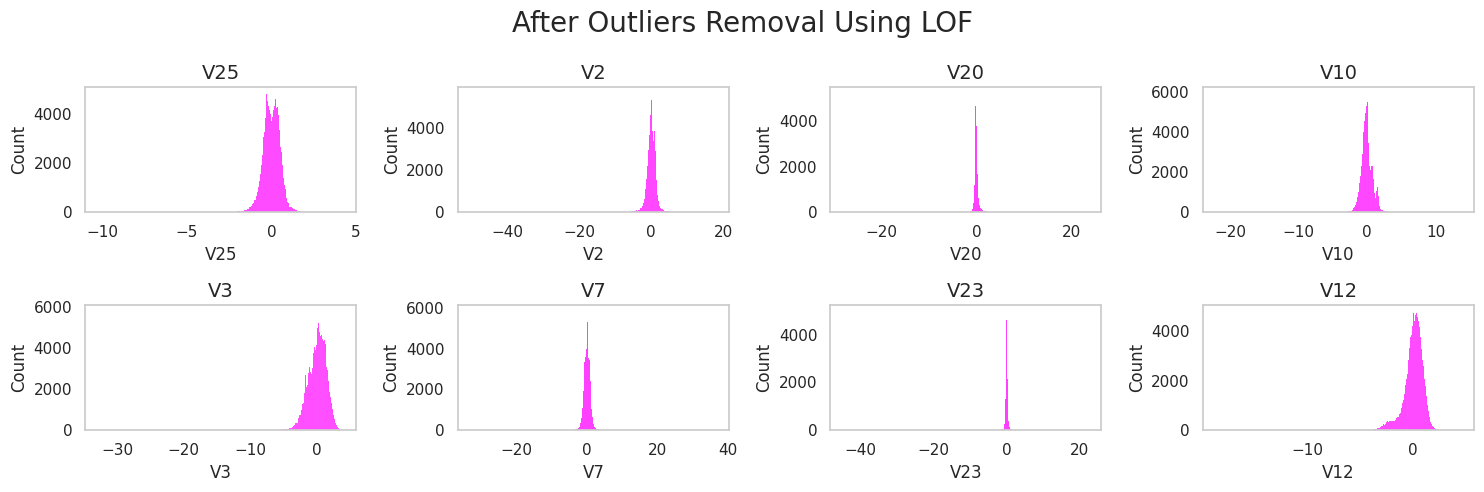

In [14]:
# Visualzing Features Before and after removal of outlier using LOF
viz_features = np.random.choice(features, 8, replace=False)
plotting_histograms(df, viz_features, "Before Removing Outliers")
plotting_histograms(new_df3, viz_features, "After Outliers Removal Using LOF")

# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Isolation Forest</div>

<div style="background:#7681B3; color: white; font-size: 16px; width: auto; height: auto; padding:5px;border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Isolation Forest is an outlier detection method that isolates data points using random decision trees. It works by creating multiple trees where each tree randomly selects features and split values to separate data points. The key idea is that outliers are easier to isolate because they differ from the majority of the data. For each point, the algorithm measures how many splits are needed to isolate it. Points that are isolated quickly (with fewer splits) are considered outliers. This method is efficient, works well with large and high-dimensional datasets, and does not require distance metrics.
</div> <br>

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240328184018/isolation-(2).webp" alt="Image" style="width: auto; height: auto; border:solid 2px teal; background:white;">
</center>

In [15]:
# Function to detect outliers and return indices of outliers using Isolation Forest
def detect_outliers_isolation_forest(df, features, n_estimators=100):
    """
    Detect unique outlier indices in specified columns of a DataFrame using Isolation Forest.

    This function identifies data points that are considered outliers based on the Isolation Forest algorithm.
    Isolation Forest works by isolating observations using random decision trees and scoring their isolation level.
    """
    
    # Extract the data for the specified features
    data = df[features].values
    
    # Initialize the IsolationForest model
    iso_forest = IsolationForest(n_estimators=n_estimators)
    
    # Fit the model and predict outliers (-1 indicates an outlier)
    outliers = iso_forest.fit_predict(data)
    
    # Find the indices of the outliers
    outlier_indices = np.where(outliers == -1)[0]
    
    # Convert to a set to remove duplicates, then return as a sorted list
    outlier_set = set(outlier_indices)
    
    print("Total Outliers:", len(outlier_set))
    return sorted(outlier_set)

In [16]:
# Detecting Outliers
outlier_indices = detect_outliers_isolation_forest(df, features)

# Removing Outliers
new_df4 = df.drop(index=outlier_indices, axis=0).reset_index(drop=True)

Total Outliers: 10783


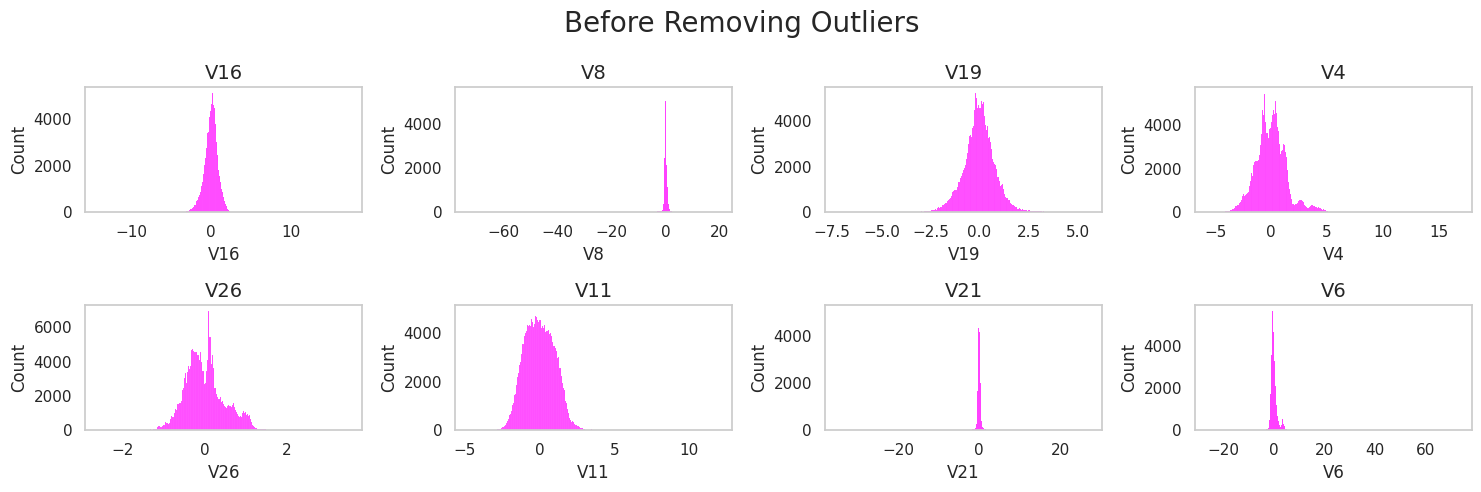

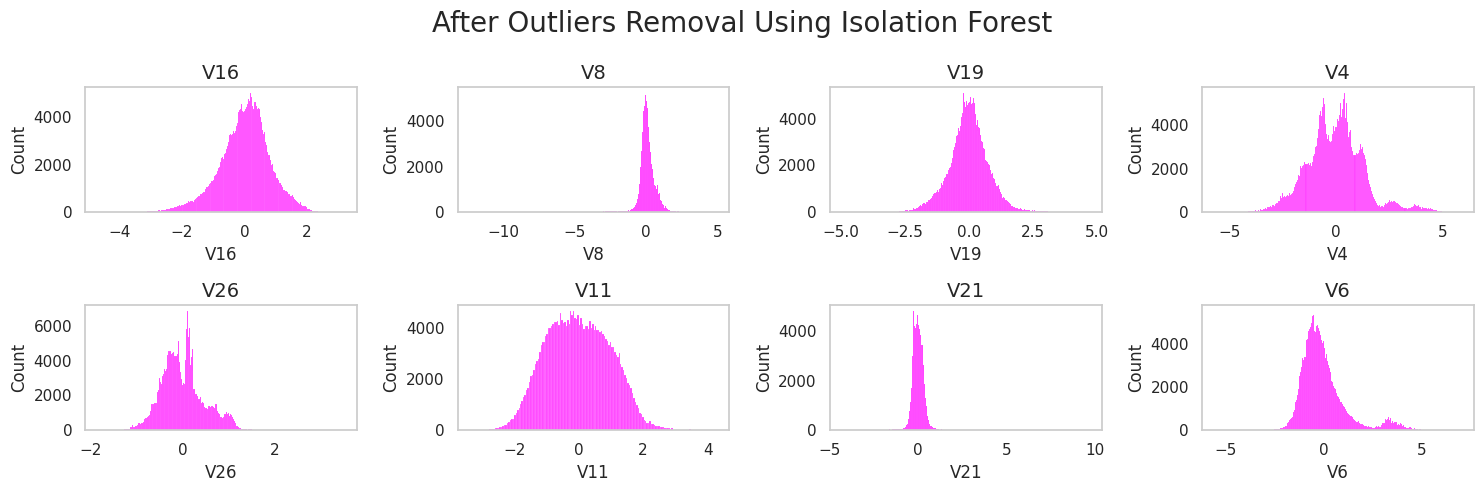

In [17]:
# Visualzing Features Before and after removal of outlier using Isolation Forest
viz_features = np.random.choice(features, 8, replace=False)
plotting_histograms(df, viz_features, "Before Removing Outliers")
plotting_histograms(new_df4, viz_features, "After Outliers Removal Using Isolation Forest")

# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">DBSCAN</div>

<div style="background:#7681B3; color: white; font-size: 16px; width: auto; height: auto; padding:5px;border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a method used to detect outliers by identifying dense clusters of points. It works by grouping points that are close together (within a specified distance) and have enough neighboring points. Points that don’t belong to any cluster, meaning they are in sparse regions with fewer neighbors, are considered outliers or noise. Essentially, DBSCAN helps find and label unusual or rare points that do not fit well into any group.
</div> <br>

<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/0*PAMQWOmks-QDe5jB.PNG" alt="Image" style="width: auto; height: auto; border:solid 2px teal; background:white;">
</center>

In [18]:
# Function to detect outliers and return indices of outliers using DBSCAN
def detect_outliers_dbscan(df, features, epsilon=3, min_samples=20):
    """
    Detect outliers using DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
    """
    
    # Extract the data for the specified features
    data = df[features].values
    
    # Initialize the DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    
    # Fit the model and predict outliers (-1 indicates an outlier)
    labels = dbscan.fit_predict(data)
    
    # Find the indices of the outliers (label -1)
    outlier_indices = np.where(labels == -1)[0]
    
    # Convert to a set to remove duplicates, then return as a sorted list
    outlier_set = set(outlier_indices)
    
    print("Total Outliers:", len(outlier_set))
    return sorted(outlier_set)

In [19]:
# Detecting Outliers
outlier_indices = detect_outliers_dbscan(df, features)

# Removing Outliers
new_df5 = df.drop(index=outlier_indices, axis=0).reset_index(drop=True)

Total Outliers: 81560


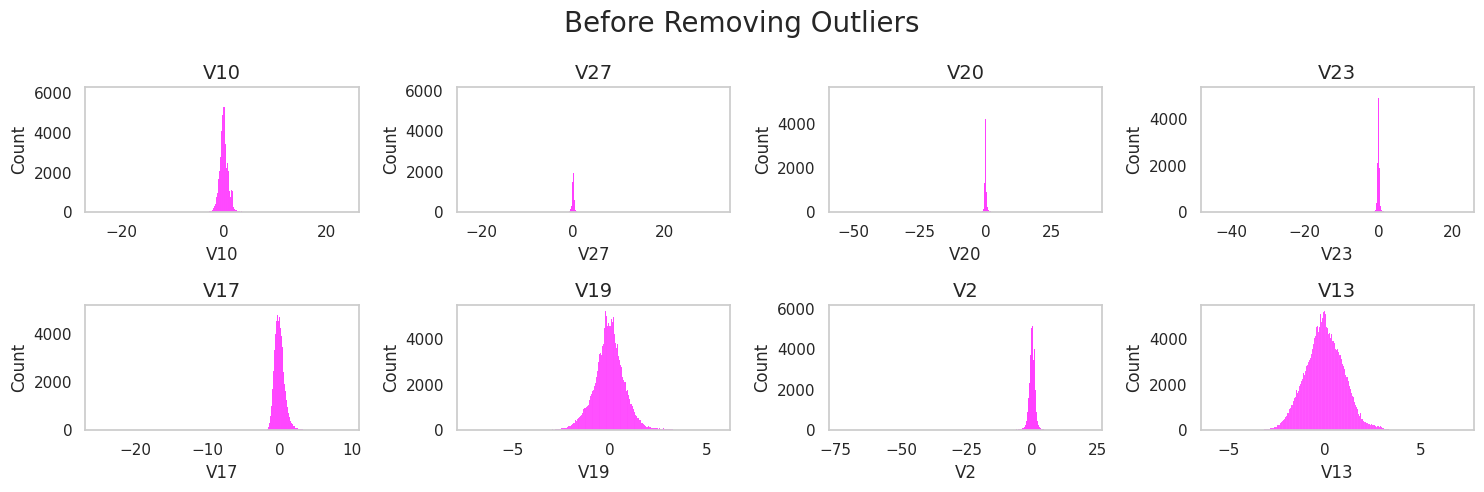

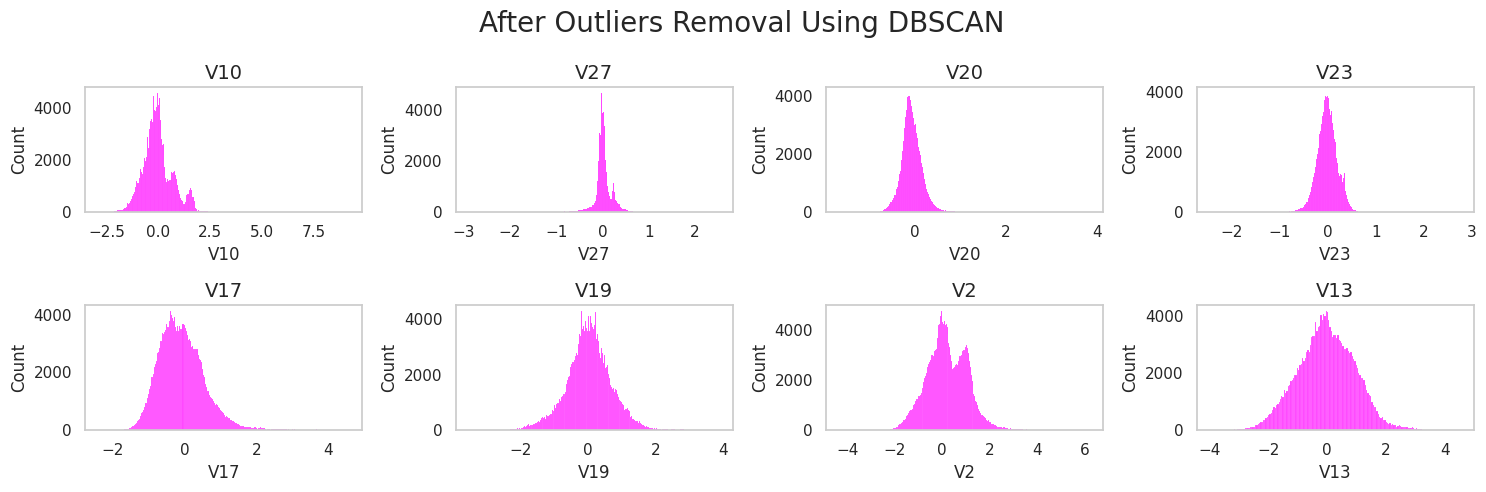

In [20]:
# Visualzing Features Before and after removal of outlier using DBSCAN
viz_features = np.random.choice(features, 8, replace=False)
plotting_histograms(df, viz_features, "Before Removing Outliers")
plotting_histograms(new_df5, viz_features, "After Outliers Removal Using DBSCAN")

# <div style="background:#55286F; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:10px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Thank you for reading! <br>If you found this helpful, please consider upvoting.</div>